Curso de Big Data
==============================

Trabajo práctico 3
------------------------------

### Grupo: Armas Braithwaite, Fernández, Menta, Vargas Ochuza

#### Parte 1: Análisis de la base de hogares y cálculo de pobreza
##### Ahora que ya se han familiarizado con la Encuesta Permanente de Hogares (EPH) y con la tabla de adulto equivalente, vamos a complejizar un poco la construcción del índice de pobreza. Lo calcularemos a nivel de hogares, con sus respectivos factores de expansioón y realizaremos una limpieza de la base con mayor dedicación. A continuación, complementamos el trabajo hecho en el TP2 usando la encuesta a nivel hogares de la EPH.

##### Inciso 1
##### Exploren el diseño de registro de la base de hogar: a priori, ¿qué variables creen que pueden ser muy predictivas de pobreza y que sería muy útil incluir para perfeccionar el ejercicio del TP2?

###### Las variables relevantes para explicar la pobreza creemos que son las siguientes:
###### - ITF_hogar (Monto de ingreso total familiar)}: Evalúa la disponibilidad de recursos económicos en el hogar, lo que está estrechamente relacionado con la pobreza.
###### - Región (REGION): La ubicación geográfica de un hogar puede tener un impacto significativo en su nivel de vida y acceso a recursos. Por lo tanto, la región en la que se encuentra el hogar es una variable importante.
###### - Características de la vivienda (IV2, IV3, IV6, IV8, IV10, IV12_1, IV_12_2, IV12_3): Estas variables describen aspectos de la vivienda, como el número de habitaciones, el estado del piso, el acceso a agua, la presencia de baño, la proximidad a basurales, zonas inundables y villas de emergencia. Estas características pueden estar relacionadas con la calidad de vida y el nivel de pobreza.
###### Características habitacionales del hogar (II1, II7, II8, II9): Estas variables describen el número de habitaciones en el hogar, el régimen de tenencia de la vivienda y el tipo de combustible utilizado para cocinar.
###### Estrategias del hogar (V1, V2, V4, V5, V6, V12, V14, V17): Estas variables exploran cómo las personas del hogar obtienen ingresos y si han tenido que recurrir a estrategias como pedir préstamos, vender pertenencias o recibir ayuda social. Estas estrategias pueden indicar la vulnerabilidad económica del hogar.
###### Resumen del hogar (IX_TOT): La cantidad de miembros en el hogar es un factor importante para evaluar la pobreza, ya que un hogar con más miembros puede requerir más recursos para satisfacer sus necesidades básicas.
###### IPCF_hogar (Monto de ingreso per cápita familiar): Proporciona información sobre los recursos disponibles por persona en el hogar, lo que está relacionado con la pobreza.

##### Inciso 2
##### Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2023 (la base de hogares se llama usu hogar T123.xls). Importen los datos de la encuesta de hogar y, al igual que en el TP2, conserven sólo las observaciones que corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o del Gran Buenos Aires

In [1]:
# Importamos el módulo necesario para trabajar con la base de datos y otros propositos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Seteamos el directorio donde vamos a trabajar
import os

os.chdir("C:/Users/bauti/OneDrive/Documentos/Escritorio/Big Data/TP2/EPH_usu_1er_Trim_2023_xlsx")
#os.chdir("C:/Users/Paula/Documents/BIGDATA/TPs_BigData/TP3")

In [3]:
# Cargamos las bases
microdata_hogar = pd.read_excel("usu_hogar_T123.xlsx")

In [4]:
microdata_indv = pd.read_excel("usu_individual_T123.xlsx")

In [5]:
# Del diccionario de variables sabemos que tenemos que quedarnos solamente con los valores 32 y 33
# que son los correspondientes a Ciudad Autónoma de Buenos Aires o Gran Buenos Aires.

# Filtramos el dataframe y lo renombramos
microdata_indv_filtered = microdata_indv[(microdata_indv['AGLOMERADO'] == 32) | (microdata_indv['AGLOMERADO'] == 33)]
len(microdata_indv_filtered)

7619

In [6]:
# Filtramos el dataframe y lo renombramos
microdata_hogar_filtered = microdata_hogar[(microdata_hogar['AGLOMERADO'] == 32) | (microdata_hogar['AGLOMERADO'] == 33)]
len(microdata_hogar_filtered)


2736

##### Inciso 3: Unan la tabla de la encuesta individual con la de la encuesta de hogar.

In [7]:
# Realizamos un inner join de las bases para quedarnos solo con las filas cuyo identificador de hogar se encuentre en ambas bases
# Importante remarcar que hacemos el merge por vivienda y hogar! ya que pueden haber 2 viviendas en un mismo hogar.

merged_microdata = microdata_indv_filtered.merge(microdata_hogar_filtered, on=['CODUSU', "NRO_HOGAR"], how='inner')

# Renombrar las columnas con sufijo "_x" a "_indv"
merged_microdata.rename(columns=lambda x: x.replace("_x", "_indv"), inplace=True)

# Renombrar las columnas con sufijo "_y" a "_hogar"
merged_microdata.rename(columns=lambda x: x.replace("_y", "_hogar"), inplace=True)

# Esto ultimo no es particularmente necesario pues muchos de los valores son duplicados.

In [8]:
# Chequeamos la dimension
len(merged_microdata)

7619

##### Inciso 4: Generen sus propias funciones para limpiar la base de datos o, si deciden utilizar funciones existentes en paquetes como numpy y pandas, mencionen cuáles usarán y de qué paquetes son.
##### &
##### Inciso 5: Limpien la base de datos tomando criterios que hagan sentido, tanto para el tratamiento de valores faltantes, de outliers, como así también decidan qué variables categóricas y strings usarían y transfórmenlas de forma que haga sentido para los ejercicios siguientes. Justifiquen sus decisiones.

In [9]:
# Identificar variables con NaN y contar cuántos NaN
# Utilizamos funciones de Pandas para identificar y limpiar NaN.

variables_con_nan = merged_microdata.columns[merged_microdata.isna().any()].tolist()
conteo_de_nans = merged_microdata[variables_con_nan].isna().sum()

# Imprimir las variables con NaN y la cantidad de NaN en cada una
for variable in variables_con_nan:
    print(f'Variable: {variable}, Cantidad de NaN: {conteo_de_nans[variable]}')

Variable: CH08, Cantidad de NaN: 1
Variable: CH14, Cantidad de NaN: 3959
Variable: CH15_COD, Cantidad de NaN: 6248
Variable: CH16_COD, Cantidad de NaN: 7515
Variable: IMPUTA, Cantidad de NaN: 7548
Variable: PP03C, Cantidad de NaN: 4096
Variable: PP03D, Cantidad de NaN: 4096
Variable: PP3E_TOT, Cantidad de NaN: 4096
Variable: PP3F_TOT, Cantidad de NaN: 4096
Variable: PP03G, Cantidad de NaN: 4096
Variable: PP03H, Cantidad de NaN: 4096
Variable: PP03I, Cantidad de NaN: 4096
Variable: PP03J, Cantidad de NaN: 4096
Variable: INTENSI, Cantidad de NaN: 4096
Variable: PP04A, Cantidad de NaN: 4096
Variable: PP04B_COD, Cantidad de NaN: 4096
Variable: PP04B1, Cantidad de NaN: 4096
Variable: PP04B2, Cantidad de NaN: 4096
Variable: PP04B3_MES, Cantidad de NaN: 4096
Variable: PP04B3_ANO, Cantidad de NaN: 4096
Variable: PP04B3_DIA, Cantidad de NaN: 4096
Variable: PP04C, Cantidad de NaN: 4096
Variable: PP04C99, Cantidad de NaN: 4096
Variable: PP04D_COD, Cantidad de NaN: 4096
Variable: PP04G, Cantidad d

In [10]:
# Establecer el umbral de 3500 para determinar qué columnas eliminar
umbral = 3500

# Eliminar columnas con más de 3500 valores NaN
# Utilizamos la funcion de Pandas dropna

merged_microdata = merged_microdata.dropna(thresh=umbral, axis=1)
merged_microdata.head(2)

,CODUSU,ANO4_indv,TRIMESTRE_indv,NRO_HOGAR,COMPONENTE,H15,REGION_indv,MAS_500_indv,AGLOMERADO_indv,PONDERA_indv,...,RDECCFR_hogar,GDECCFR_hogar,ADECCFR_hogar,PONDIH_hogar,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5,5.0,6,2540,1,0,2,0,0,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5,5.0,6,2540,1,0,2,0,0,0


In [11]:
# Definimos las variables que deseamos filtrar
variables = ['ITF_hogar', 'ITF_indv', 'IPCF_hogar', 'IPCF_indv', 'P21', 'P47T']

# Definir el umbral del percentil (en este caso, 97%)
percentile_threshold = 0.97

# Iterar sobre las variables y aplicar el filtrado utlizando Pandas.
for variable in variables:
    # Calcular el percentil umbral
    percentile_value = merged_microdata[variable].quantile(percentile_threshold)
    
    # Filtrar el DataFrame para mantener solo los valores por debajo del percentil
    merged_microdata = merged_microdata[merged_microdata[variable] <= percentile_value]

len(merged_microdata)

6363

In [12]:
# Limpiamos algunas variables con valores especificos utlizando Pandas

merged_microdata = merged_microdata[merged_microdata['CH08'] != 9]
merged_microdata = merged_microdata[merged_microdata['IV2'] != 99]
merged_microdata = merged_microdata[merged_microdata['II1'] != 99]
merged_microdata = merged_microdata[merged_microdata['II9'] > 0]
merged_microdata = merged_microdata[merged_microdata['ITF_hogar'] >= 0]
merged_microdata = merged_microdata[merged_microdata['ITF_indv'] >= 0]
merged_microdata = merged_microdata[merged_microdata['IPCF_hogar'] >= 0]
merged_microdata = merged_microdata[merged_microdata['IPCF_indv'] >= 0]


len(merged_microdata)

6335

##### Inciso 6: Presenten estadísticas descriptivas de cinco variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir pobreza.

**IV8** Tiene baño

**IV3** Piso interior de la casa

**V4** La cubierta exterior del techo es de...

**IV11** El desague del baño es...

**IPCF_hogar** Monto de ingreso per cápita familiar del hogar

##### Separamos el analisis entre categoricas y no categoricas.

In [13]:
merged_microdata['IPCF_hogar'].describe().T

count      6335.000000
mean      25048.015656
std       32095.284287
min           0.000000
25%           0.000000
50%           0.000000
75%       45480.000000
max      125000.000000
Name: IPCF_hogar, dtype: float64

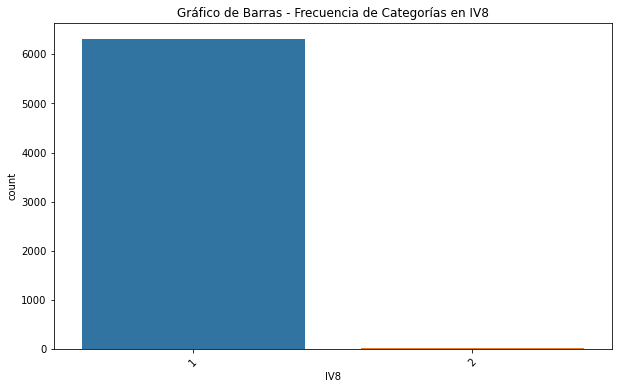

Porcentaje de cada categoría en IV8:
1    99.73165
2     0.26835
Name: IV8, dtype: float64



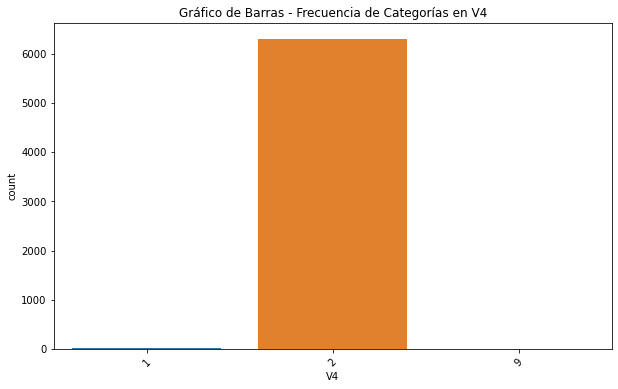

Porcentaje de cada categoría en V4:
2    99.526440
1     0.347277
9     0.126283
Name: V4, dtype: float64



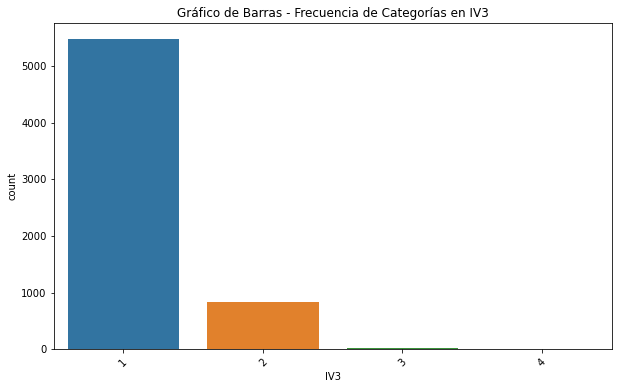

Porcentaje de cada categoría en IV3:
1    86.566693
2    13.149171
3     0.205209
4     0.078927
Name: IV3, dtype: float64



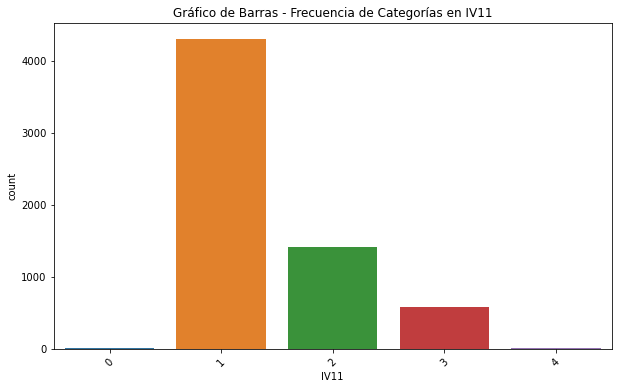

Porcentaje de cada categoría en IV11:
1    68.034728
2    22.304657
3     9.171271
0     0.268350
4     0.220994
Name: IV11, dtype: float64



In [14]:
variables = ['IV8', 'V4', 'IV3', 'IV11']

for var in variables:
    # Conteo de frecuencias
    conteo_frecuencias = merged_microdata[var].value_counts()

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_microdata, x=var)
    plt.title(f'Gráfico de Barras - Frecuencia de Categorías en {var}')
    plt.xticks(rotation=45)
    plt.show()

    # Porcentaje de cada categoría
    porcentaje = merged_microdata[var].value_counts(normalize=True) * 100
    print(f"Porcentaje de cada categoría en {var}:")
    print(porcentaje)
    print()

In [15]:
# Armamos una función para no tener que lidiar con el tedioso uso del archivo de Excel.

# Esta función, asignar_valor, toma dos argumentos, edad y genero, y asigna un valor numérico basado en reglas condicionales
# que dependen de estos dos argumentos. Las condiciones se prueban en orden y, cuando se encuentra una coincidencia, se
# devuelve un valor específico. Si no se cumple ninguna condición, la función devuelve None.
#Las condiciones están diseñadas para categorizar a las personas en grupos según su edad y género y asignarles un valor numérico basado en esas categorías.

def asignar_valor(edad, genero):
    if edad < 1:
        if genero == 2:
            return 0.35
        elif genero == 1:
            return 0.35
    elif edad == 1:
        if genero == 2:
            return 0.37
        elif genero == 1:
            return 0.37
    elif edad == 2:
        if genero == 2:
            return 0.46
        elif genero == 1:
            return 0.46
    elif edad == 3:
        if genero == 2:
            return 0.51
        elif genero == 1:
            return 0.51
    elif edad == 4:
        if genero == 2:
            return 0.55
        elif genero == 1:
            return 0.55
    elif edad == 5:
        if genero == 2:
            return 0.60
        elif genero == 1:
            return 0.60
    elif edad == 6:
        if genero == 2:
            return 0.64
        elif genero == 1:
            return 0.64
    elif edad == 7:
        if genero == 2:
            return 0.66
        elif genero == 1:
            return 0.66
    elif edad == 8:
        if genero == 2:
            return 0.68
        elif genero == 1:
            return 0.68
    elif edad == 9:
        if genero == 2:
            return 0.69
        elif genero == 1:
            return 0.69
    elif edad == 10:
        if genero == 2:
            return 0.70
        elif genero == 1:
            return 0.79
    elif edad == 11:
        if genero == 2:
            return 0.72
        elif genero == 1:
            return 0.82
    elif edad == 12:
        if genero == 2:
            return 0.74
        elif genero == 1:
            return 0.85
    elif edad == 13:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 0.90
    elif edad == 14:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 0.96
    elif edad == 15:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.00
    elif edad == 16:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.03
    elif edad == 17:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.04
    elif 18 <= edad <= 29:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 1.02
    elif 30 <= edad <= 45:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.00
    elif 46 <= edad <= 60:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 1.00
    elif 61 <= edad <= 75:
        if genero == 2:
            return 0.67
        elif genero == 1:
            return 0.83
    elif edad > 75:
        if genero == 2:
            return 0.63
        elif genero == 1:
            return 0.74
    else:
        return None  # En caso de que no haya una combinación válida

##### Inciso 7: Repitan el inciso 1.2.f del TP2 para construir la columna adulto equiv y la columna ad equiv hogar (pueden utilizar su código del TP2).

In [16]:
# Aplicamos la funcion al data frame. Creamos una nueva columna llamada 'adulto_equiv' en el DataFrame 'microdata_filtered', donde se calculan y asignan valores equivalentes para adultos
# a partir de las edades ('CH06') y géneros ('CH04') de cada fila utilizando una función llamada 'asignar_valor'.

merged_microdata['adulto_equiv'] = merged_microdata.apply(lambda row: asignar_valor(row['CH06'], row['CH04']), axis=1)

In [17]:
# Limpiamos y Renombramos

merged_microdata = merged_microdata.dropna(subset=['adulto_equiv'])

result = merged_microdata.groupby(by=['CODUSU','NRO_HOGAR']).agg({'adulto_equiv': 'sum'}).reset_index()
result.rename(columns={'adulto_equiv': 'ad_equiv_hogar'}, inplace=True)

merged_microdata_FINAL = pd.merge(merged_microdata, result[['CODUSU','NRO_HOGAR', 'ad_equiv_hogar']],
                     on=['CODUSU','NRO_HOGAR'],
                     how='left')

##### Inciso 8: Repitan el inciso 1.3 y 1.4 del TP2 para dividir la base en dos dataframes donde: uno conserve las personas que no reportaron ITF (dataframe llamado respondieron) y otro conserve a las personas que no reportaron ITF (llamado norespondieron). Además, agreguen a la base respondieron una columna llamada ingreso necesario que sea el producto de la canasta básica por ad equiv hogar.

In [18]:
# Definimos ambas bases según los criterios del enunciado, comprobando la condición sobre ITF.
# Imprimimos la longitud del DataFrame para obtener las cantidades.

# Reemplazar NaN por ceros en ITF_indv e ITF_hogar
merged_microdata['ITF_indv'].fillna(0, inplace=True)
merged_microdata['ITF_hogar'].fillna(0, inplace=True)

respondieron = merged_microdata_FINAL[(merged_microdata_FINAL['ITF_indv'] != 0) | (merged_microdata_FINAL['ITF_hogar'] != 0)]
print(len(respondieron))

norespondieron = merged_microdata_FINAL[(merged_microdata_FINAL['ITF_indv'] == 0) & (merged_microdata_FINAL['ITF_hogar'] == 0)]
print(len(norespondieron))

3132
3203


In [19]:
# Definimos el valor de la canasta básica y luego
# seguimos las instrucciones del enunciado para añadir una columna que indique el ingreso necesario

valor_canasta_basica = 57371.05

respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * valor_canasta_basica

C:\Users\bauti\AppData\Local\Temp/ipykernel_1292/3528590793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * valor_canasta_basica


##### Inciso 9: Agreguen a la base respondieron una columna llamada pobre, que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia y 0 en caso contrario.

In [20]:
# Creamos una nueva columna llamada 'pobre' en el DataFrame 'respondieron',
# donde se asigna un valor de 1 si el valor en la columna 'ITF' es menor que
# el valor en la columna 'ingreso_necesario', y 0 en caso contrario, convirtiendo los resultados a enteros.

respondieron['pobre'] = ((respondieron['ITF_hogar'] < respondieron['ingreso_necesario']) & (respondieron['ITF_indv'] < respondieron['ingreso_necesario'])).astype(int)

# Sumamos todos los 1

num_pobres = respondieron['pobre'].sum()

print(f'Número de pobres identificados: {num_pobres}')

# En %

print(num_pobres/len(respondieron))



Número de pobres identificados: 1487
0.47477650063856963


C:\Users\bauti\AppData\Local\Temp/ipykernel_1292/2894708243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = ((respondieron['ITF_hogar'] < respondieron['ingreso_necesario']) & (respondieron['ITF_indv'] < respondieron['ingreso_necesario'])).astype(int)


##### Inciso 10: En el TP2 calcularon los individuos bajo la línea de pobreza. Sin embargo, cuando se habla de pobreza el número más utilizado es el de la tasa de hogares bajo la línea de pobreza. Para calcularlo, utilicen una sola observación por hogar y sumen el ponderador PONDIH que permite expandir la muestra de la EPH al total de la población que representa. ¿Cuál es la tasa de hogares bajo la línea de pobreza para el GBA? ¿Se asemeja al que reporta el INDEC en sus informes?

In [21]:
merged_microdata_FINAL['PONDIH_hogar']

0        2540
1        2540
2       14082
3       14082
4       14082
        ...  
6330     4220
6331     4220
6332        0
6333        0
6334        0
Name: PONDIH_hogar, Length: 6335, dtype: int64

In [22]:
# Agrupar por hogar y utilizar el ponderador PONDIH para calcular la tasa de hogares pobres
# Agrupamos los datos por el código del hogar (CODUSU)
microdata_repres = respondieron.groupby('CODUSU').first().reset_index()


In [23]:
# Ponderacion
microdata_repres['ponderacion'] = microdata_repres['PONDIH_indv'] * microdata_repres['pobre']

In [24]:
pobres = microdata_repres['ponderacion'].sum()
poblacion = microdata_repres['PONDIH_indv'].sum()
porcentaje_pobres = (pobres / poblacion) * 100

In [25]:
pobres1 = '{:,}'.format(pobres).replace(',', '.')
print(f"pobres: {pobres1}")
print(f"tasa {porcentaje_pobres:.2f}%")

pobres: 1.439.914
tasa 36.67%


#### La tasa de pobreza nos dio 6 PP mayor que la reportada por el INDEC. Creemos que esto puede ser debido a distintos criterios de limpieza de la base. Aun asi, la diferencia no es tan significativa.

# Parte 2: Construcción de funciones

In [26]:
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

import os  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier


## Inciso 1

#### Escriban una funcion, llamada evalua metodo, que reciba como argumentos un modelo y los datos de entrenamiento y prueba (X train, y train, X test,y test).
#### La función debe ajustar el modelo con los datos de entrenamiento y calcular las métricas que considere necesarias para esta problem´atica (de mínima, deben reportar la matriz de confusión, las curvas ROC y los valores d eAUC y de accuracy score de cada método). 
#### El output de la función debe seruna colección con las métricas evaluadas.


In [27]:
# Cargamos una base de internet para probar la función. 
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

In [28]:
# Quitamos todas las variables que sean string y todas las filas con NAs
titanic_df = titanic_df.drop(titanic_df.select_dtypes(include=['object']).columns, axis=1)
titanic_df=titanic_df.dropna()

In [29]:
# Formamos un df de variables explicativas y otro con la variable dependiente.
X=titanic_df.drop(columns=['Survived'])
y=titanic_df.Survived

In [30]:
# Le agregamos una columna de 1s al dataframe X para que sirva como el intercepto.
X = sm.add_constant(X)

C:\Users\bauti\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [32]:
def evalua_metodo(model, X_train, y_train, X_test, y_test,plot=True):
    
    model_to_evaluate = model

    # Ajustar el modelo con los datos de entrenamiento
    model_fit = model_to_evaluate.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_fit.predict(X_test)

    # Calcular el área bajo la curva ROC y trazar la curva ROC
    auc = roc_auc_score(y_test, y_pred)
    print('AUC: %.4f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)

    print('Confusion Matrix:')
    print(matriz_confusion) 

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score:', accuracy)

    # Trazar la curva ROC
    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (área = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('Tasa de falsos positivos')
        plt.ylabel('Tasa de verdaderos positivos')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()
    
    # ECM
    ecm = mean_squared_error(y_test, y_pred) # Deseamos tener esta métrica disponible para la siguiente función. 


    # Retornar las métricas evaluadas
    metrics = {
        'AUC': auc,
        'Confusion Matrix': matriz_confusion,
        'Accuracy Score': accuracy,
        'ECM': ecm
    }

    return metrics

In [ ]:
"""def evalua_metodo(modelo, X_train, y_train, X_test, y_test, h_l=0.0001, h_k=5):
    
    '''
    Evalua un modelo de clasificación proporcionando métricas clave y visualizando la curva ROC.
    
    Input:
    - modelo: modelo de clasificación ya instanciado (debe tener los métodos `fit`, `predict` y `predict_proba`).
    - X_train, y_train: datos de entrenamiento.
    - X_test, y_test: datos de prueba.
    
    Output:
    - Diccionario con las siguientes métricas:
        * matriz_confusion: Matriz de confusión del modelo.
        * valor_auc: Área bajo la curva ROC.
        * accuracy: Precisión del modelo.
        *ECM (MSE en inglés): error cuadrático medio
    - Gráfico de la curva ROC.
    '''
    # Entrenando el modelo
    if modelo==KNeighborsClassifier:
        y = modelo(h_k).fit(X_train, y_train)
    elif modelo== LogisticRegression:
        y = modelo(C=1/h_l).fit(X_train, y_train)
    elif modelo== LinearDiscriminantAnalysis:
        y = modelo().fit(X_train, y_train)
    else:
        y = modelo.fit(X_train, y_train)    
    # Predicciones
    y_pred = modelo.predict(X_test)
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]
    
    # Calculando métricas
    matriz_confusion = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    valor_auc = auc(fpr, tpr)
    accuracy = accuracy_score(y_test, y_pred)
    ecm = mean_squared_error(y_test, y_pred) # Deseamos tener esta métrica disponible para la siguiente función. 
    # Dibujando la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (área = %0.2f)' % valor_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()
    
    # Retornando métricas
    return {
        'matriz_confusion': matriz_confusion,
        'valor_auc': valor_auc,
        'accuracy': accuracy,
        'ecm': ecm,
    }

"""

In [ ]:
# Vamos a probar la función con diferentes modelos e hiperparámetros.

AUC: 0.6860
Confusion Matrix:
[[109  16]
 [ 45  45]]
Accuracy Score: 0.7162790697674418


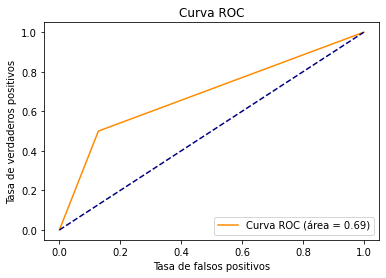

{'AUC': 0.686, 'Confusion Matrix': array([[109,  16],
       [ 45,  45]], dtype=int64), 'Accuracy Score': 0.7162790697674418, 'ECM': 0.2837209302325581}


In [33]:
modelo = LogisticRegression(max_iter=10000)
# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
print(resultados)

AUC: 0.6860
Confusion Matrix:
[[109  16]
 [ 45  45]]
Accuracy Score: 0.7162790697674418


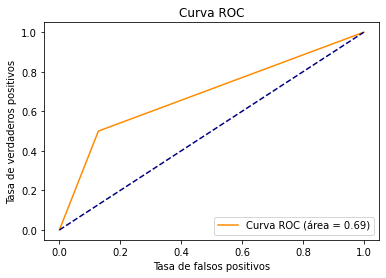

{'AUC': 0.686, 'Confusion Matrix': array([[109,  16],
       [ 45,  45]], dtype=int64), 'Accuracy Score': 0.7162790697674418, 'ECM': 0.2837209302325581}


In [34]:
# Definir el modelo
modelo = LogisticRegression(max_iter=10000)
# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
print(resultados)

AUC: 0.5978
Confusion Matrix:
[[105  20]
 [ 58  32]]
Accuracy Score: 0.6372093023255814


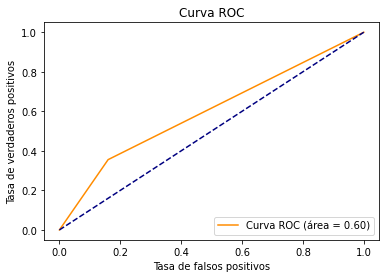

{'AUC': 0.5977777777777779, 'Confusion Matrix': array([[105,  20],
       [ 58,  32]], dtype=int64), 'Accuracy Score': 0.6372093023255814, 'ECM': 0.3627906976744186}


In [35]:
# Definir el modelo
knn = KNeighborsClassifier(n_neighbors=5)
#Usar la función evalua_metodo
resultados = evalua_metodo(knn, X_train, y_train, X_test, y_test)
print(resultados)

AUC: 0.6860
Confusion Matrix:
[[109  16]
 [ 45  45]]
Accuracy Score: 0.7162790697674418


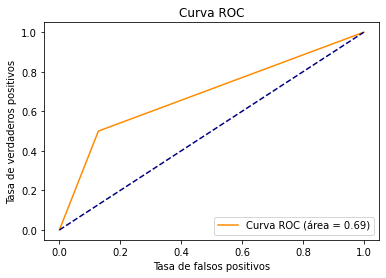

{'AUC': 0.686, 'Confusion Matrix': array([[109,  16],
       [ 45,  45]], dtype=int64), 'Accuracy Score': 0.7162790697674418, 'ECM': 0.2837209302325581}


In [36]:
# Definir el modelo
modelo3= LinearDiscriminantAnalysis(n_components=1)
#Usar la función evalua_metodo
resultados = evalua_metodo(modelo3, X_train, y_train, X_test, y_test)
print(resultados)

## Inciso 2

#### Escriban una función, llamada cross validation, que realice validación cruzada con k iteraciones (k-fold CV), llamando a la función del  inciso anterior en cada una, pero para las k distintas particiones. 
#### La función debe recibir como argumentos el modelo, el valor de k y un dataset (es decir, s´olo X e y).
#### Pueden ayudarse con la función KFold para generar las particiones necesarias

In [37]:
from sklearn.preprocessing import StandardScaler

In [29]:
"""def cross_validation(modelo, k, x, y, std=True):
    '''
    Realiza validación cruzada de un modelo de clasificación y provee la distribución de varias métricas de precisión.
    Input:
    - modelo: modelo de clasificación ya instanciado (debe tener los métodos `fit`, `predict` y `predict_proba`).
    - k: número de particiones
    - x: variables explicativas. Ya debe contener una columnas con 1s y debe estar en formato dataframe o numpyarray.
    - y: variable categórica a predecir. Debe estar en formato dataframe o numpyarray.
    Output:
    - Dataframe con las siguientes métricas:
        * matriz_confusion: Matriz de confusión del modelo.
        * valor_auc: Área bajo la curva ROC.
        * accuracy: Precisión del modelo.
        *ECM (MSE en inglés): error cuadrático medio
    '''
    # Convertimos la data en pandas dataframe en caso no lo haya estado originalmente.
    if isinstance(x, np.ndarray):
        x = pd.DataFrame(x)
    if isinstance(y, np.ndarray):
        y = pd.DataFrame(y)
    
    sc = StandardScaler()
    kf = KFold(n_splits=k, shuffle=True)
    output = []
    for i, (train_index, test_index) in enumerate(kf.split(x)):
        x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
        
        if std == True:
            # Estandarizamos las variables explicativas de las muestras de entrenamiento y de prueba
            x_train = pd.DataFrame(sc.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
            x_test = pd.DataFrame(sc.transform(x_test), index=x_test.index, columns=x_test.columns)
        
        modelo.fit(x_train, y_train)
        # Predicciones
        y_pred = modelo.predict(x_test)
        y_pred_prob = modelo.predict_proba(x_test)[:, 1]
        
        # Calculando métricas
        matriz_confusion = confusion_matrix(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        valor_auc = auc(fpr, tpr)
        accuracy = accuracy_score(y_test, y_pred)
        ecm = mean_squared_error(y_test, y_pred)
        
        output.append((i+1, ecm, valor_auc, accuracy))
        
    output_df = pd.DataFrame(output, columns=["Particion", "MSE", "valor_auc", "accuracy"])
    return output_df"""


'def cross_validation(modelo, k, x, y, std=True):\n    \'\'\'\n    Realiza validación cruzada de un modelo de clasificación y provee la distribución de varias métricas de precisión.\n    Input:\n    - modelo: modelo de clasificación ya instanciado (debe tener los métodos `fit`, `predict` y `predict_proba`).\n    - k: número de particiones\n    - x: variables explicativas. Ya debe contener una columnas con 1s y debe estar en formato dataframe o numpyarray.\n    - y: variable categórica a predecir. Debe estar en formato dataframe o numpyarray.\n    Output:\n    - Dataframe con las siguientes métricas:\n        * matriz_confusion: Matriz de confusión del modelo.\n        * valor_auc: Área bajo la curva ROC.\n        * accuracy: Precisión del modelo.\n        *ECM (MSE en inglés): error cuadrático medio\n    \'\'\'\n    # Convertimos la data en pandas dataframe en caso no lo haya estado originalmente.\n    if isinstance(x, np.ndarray):\n        x = pd.DataFrame(x)\n    if isinstance(y, np.

In [38]:
from sklearn.model_selection import KFold

def cross_validation(modelo, k, x, y, std=True):
    if isinstance(x, np.ndarray):
        x = pd.DataFrame(x)
    if isinstance(y, np.ndarray):
        y = pd.DataFrame(y)

    sc = StandardScaler()
    kf = KFold(n_splits=k, shuffle=True)
    output = []

    for i, (train_index, test_index) in enumerate(kf.split(x)):
        x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

        if std:
            x_train = pd.DataFrame(sc.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
            x_test = pd.DataFrame(sc.transform(x_test), index=x_test.index, columns=x_test.columns)

        # Llamar a evalua_metodo para calcular las métricas
        metrics = evalua_metodo(modelo, x_train, y_train, x_test, y_test,plot=False)

        # Extraer las métricas calculadas en evalua_metodo
        matriz_confusion = metrics['Confusion Matrix']
        valor_auc = metrics['AUC']
        accuracy = metrics['Accuracy Score']
        ecm = metrics['ECM']

        output.append((i+1, ecm, valor_auc, accuracy, matriz_confusion))

    output_df = pd.DataFrame(output, columns=["Particion", "MSE", "valor_auc", "accuracy", "matriz_confusion"])
    return output_df


In [39]:
# Ejemplo de la función con 5 particiones y sin estandarización. 
cross_validation(modelo,5,X,y,std=False)

AUC: 0.6291
Confusion Matrix:
[[76 15]
 [30 22]]
Accuracy Score: 0.6853146853146853
AUC: 0.7220
Confusion Matrix:
[[66 14]
 [24 39]]
Accuracy Score: 0.7342657342657343
AUC: 0.6536
Confusion Matrix:
[[67 16]
 [30 30]]
Accuracy Score: 0.6783216783216783
AUC: 0.6286
Confusion Matrix:
[[63 11]
 [41 28]]
Accuracy Score: 0.6363636363636364
AUC: 0.7154
Confusion Matrix:
[[81 15]
 [19 27]]
Accuracy Score: 0.7605633802816901


,Particion,MSE,valor_auc,accuracy,matriz_confusion
0,1,0.314685,0.629121,0.685315,"[[76, 15], [30, 22]]"
1,2,0.265734,0.722024,0.734266,"[[66, 14], [24, 39]]"
2,3,0.321678,0.653614,0.678322,"[[67, 16], [30, 30]]"
3,4,0.363636,0.628574,0.636364,"[[63, 11], [41, 28]]"
4,5,0.239437,0.715353,0.760563,"[[81, 15], [19, 27]]"


## Inciso 3

#### Escriban una función, llamada evalua config que reciba una lista de configuraciones de hiperparámetros (los distintos valores a probar como hiper-parámetros podrian codificarse en diccionarios de Python)y utilizando la función cross validation obtenga el error cuadrado promedio para cada configuración.

In [40]:
def evalua_config(model_types, lambdas, X, y):
    """
    Encuentra el valor óptimo de lambda (α) para Ridge, Lasso o ambos modelos en un modelo de clasificación.

    Args:
    - model_types: Lista de tipos de modelo ('ridge', 'lasso', o ambos).
    - lambdas: Lista de valores de lambda (α) para evaluar.
    - X: Variables explicativas.
    - y: Variable objetivo (etiquetas binarias 0 y 1).

    Returns:
    - DataFrame que contiene los valores de lambda y los errores cuadráticos medios asociados para los modelos seleccionados.
    """

    if not all(model_type in ['ridge', 'lasso'] for model_type in model_types):
        raise ValueError("Los elementos en 'model_types' deben ser 'ridge', 'lasso', o ambos.")

    resultados_lambda = []

    for model_type in model_types:
        if model_type == 'ridge':
            modelo = LogisticRegression(penalty='l2', solver='liblinear')
        else:
            modelo = LogisticRegression(penalty='l1', solver='liblinear')

        for alpha in lambdas:
            modelo.set_params(C=1/alpha)

            # Realizar validación cruzada utilizando cross_validation
            resultados = cross_validation(modelo, k=5, x=X, y=y, std=True)

            # Calcular el Error Cuadrático Medio (ECM) promedio
            ecm_promedio = np.mean(resultados['MSE'])

            resultados_lambda.append((model_type, alpha, ecm_promedio))

    # Crear un DataFrame a partir de la lista de tuplas
    resultados_df = pd.DataFrame(resultados_lambda, columns=["Model Type", "Lambda", "ECM"])
    
    return resultados_df

In [35]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
"""
def evalua_config(model_type, lambdas, X, y):
    
    Encuentra el valor óptimo de lambda (α) para Ridge o Lasso Regression en un modelo de clasificación.

    Args:
    - model_type: 'ridge' o 'lasso' para seleccionar el tipo de modelo.
    - lambdas: Lista de valores de lambda (α) para evaluar.
    - X: Variables explicativas.
    - y: Variable objetivo (etiquetas binarias 0 y 1).

    Returns:
    - DataFrame que contiene los valores de lambda y los errores cuadráticos medios asociados.

    if model_type not in ['ridge', 'lasso']:
        raise ValueError("El 'model_type' debe ser 'ridge' o 'lasso'.")

    if model_type == 'ridge':
        modelo = LogisticRegression(penalty='l2', solver='liblinear')
    else:
        modelo = LogisticRegression(penalty='l1', solver='liblinear')

    resultados_lambda = []

    for alpha in lambdas:
        modelo.set_params(C=1/alpha)

        # Realizar validación cruzada utilizando cross_validation
        resultados = cross_validation(modelo, k=5, x=X, y=y, std=True)

        # Calcular el Error Cuadrático Medio (ECM) promedio
        ecm_promedio = np.mean(resultados['MSE'])

        resultados_lambda.append((alpha, ecm_promedio))

    # Crear un DataFrame a partir de la lista de tuplas
    resultados_df = pd.DataFrame(resultados_lambda, columns=["Lambda", "ECM"])
    
    return resultados_df
"""

In [41]:
# Ejemplo de uso para Ridge Regression (Regresión Logística con regularización Ridge):
lambdas_ridge = [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000, 10000]
resultados_ridge = evalua_config(['ridge'], lambdas_ridge, X, y)


AUC: 0.7294
Confusion Matrix:
[[68  9]
 [28 38]]
Accuracy Score: 0.7412587412587412
AUC: 0.6489
Confusion Matrix:
[[71 18]
 [27 27]]
Accuracy Score: 0.6853146853146853
AUC: 0.6485
Confusion Matrix:
[[74 13]
 [31 25]]
Accuracy Score: 0.6923076923076923
AUC: 0.6729
Confusion Matrix:
[[75 11]
 [30 27]]
Accuracy Score: 0.7132867132867133
AUC: 0.6484
Confusion Matrix:
[[64 21]
 [26 31]]
Accuracy Score: 0.6690140845070423
AUC: 0.7364
Confusion Matrix:
[[72 16]
 [19 36]]
Accuracy Score: 0.7552447552447552
AUC: 0.6367
Confusion Matrix:
[[76  9]
 [36 22]]
Accuracy Score: 0.6853146853146853
AUC: 0.6526
Confusion Matrix:
[[70 16]
 [29 28]]
Accuracy Score: 0.6853146853146853
AUC: 0.6335
Confusion Matrix:
[[62 18]
 [32 31]]
Accuracy Score: 0.6503496503496503
AUC: 0.7101
Confusion Matrix:
[[73 12]
 [25 32]]
Accuracy Score: 0.7394366197183099
AUC: 0.6512
Confusion Matrix:
[[65 16]
 [31 31]]
Accuracy Score: 0.6713286713286714
AUC: 0.6364
Confusion Matrix:
[[75 12]
 [33 23]]
Accuracy Score: 0.685314685

In [42]:
# Ejemplo de uso para Lasso Regression (Regresión Logística con regularización Lasso):
lambdas_lasso = [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000, 10000]
resultados_lasso = evalua_config(['lasso'], lambdas_lasso, X, y)

AUC: 0.6448
Confusion Matrix:
[[77 13]
 [30 23]]
Accuracy Score: 0.6993006993006993
AUC: 0.6350
Confusion Matrix:
[[70 16]
 [31 26]]
Accuracy Score: 0.6713286713286714
AUC: 0.7576
Confusion Matrix:
[[79  8]
 [22 34]]
Accuracy Score: 0.7902097902097902
AUC: 0.6833
Confusion Matrix:
[[66 13]
 [30 34]]
Accuracy Score: 0.6993006993006993
AUC: 0.6364
Confusion Matrix:
[[62 20]
 [29 31]]
Accuracy Score: 0.6549295774647887
AUC: 0.6014
Confusion Matrix:
[[70 15]
 [36 22]]
Accuracy Score: 0.6433566433566433
AUC: 0.7217
Confusion Matrix:
[[67 18]
 [20 38]]
Accuracy Score: 0.7342657342657343
AUC: 0.6974
Confusion Matrix:
[[76 16]
 [22 29]]
Accuracy Score: 0.7342657342657343
AUC: 0.6840
Confusion Matrix:
[[69 12]
 [30 32]]
Accuracy Score: 0.7062937062937062
AUC: 0.6329
Confusion Matrix:
[[68 13]
 [35 26]]
Accuracy Score: 0.6619718309859155
AUC: 0.6921
Confusion Matrix:
[[72 11]
 [29 31]]
Accuracy Score: 0.7202797202797203
AUC: 0.7098
Confusion Matrix:
[[64 15]
 [25 39]]
Accuracy Score: 0.720279720

In [43]:
# Ejemplo de uso para ambos métodos de regularización:
lambdas_ambos = [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000, 10000]
resultados_ambos = evalua_config(['ridge','lasso'], lambdas_ambos, X, y)

AUC: 0.6702
Confusion Matrix:
[[68 22]
 [22 31]]
Accuracy Score: 0.6923076923076923
AUC: 0.6886
Confusion Matrix:
[[67 13]
 [29 34]]
Accuracy Score: 0.7062937062937062
AUC: 0.6849
Confusion Matrix:
[[71 14]
 [27 31]]
Accuracy Score: 0.7132867132867133
AUC: 0.6759
Confusion Matrix:
[[71 15]
 [27 30]]
Accuracy Score: 0.7062937062937062
AUC: 0.6576
Confusion Matrix:
[[74  9]
 [34 25]]
Accuracy Score: 0.6971830985915493
AUC: 0.7139
Confusion Matrix:
[[73 13]
 [24 33]]
Accuracy Score: 0.7412587412587412
AUC: 0.6714
Confusion Matrix:
[[75 15]
 [26 27]]
Accuracy Score: 0.7132867132867133
AUC: 0.6925
Confusion Matrix:
[[77 10]
 [28 28]]
Accuracy Score: 0.7342657342657343
AUC: 0.6192
Confusion Matrix:
[[62 13]
 [40 28]]
Accuracy Score: 0.6293706293706294
AUC: 0.6663
Confusion Matrix:
[[67 19]
 [25 31]]
Accuracy Score: 0.6901408450704225
AUC: 0.7158
Confusion Matrix:
[[69 15]
 [23 36]]
Accuracy Score: 0.7342657342657343
AUC: 0.6847
Confusion Matrix:
[[74 16]
 [24 29]]
Accuracy Score: 0.720279720

In [44]:
# Mostrar el DataFrame asociado a Ridge
print("Resultados para Ridge:")
print(resultados_ridge)

# Lambda con menor ECM para Ridge
mejor_lambda_ridge = resultados_ridge.loc[resultados_ridge['ECM'].idxmin()]['Lambda']
print("Valor óptimo de lambda (Ridge):", mejor_lambda_ridge)

# Mostrar el DataFrame asociado a Lasso
print("\nResultados para Lasso:")
print(resultados_lasso)

# Lambda con menor ECM para Lasso
mejor_lambda_lasso = resultados_lasso.loc[resultados_lasso['ECM'].idxmin()]['Lambda']
print("Valor óptimo de lambda (Lasso):", mejor_lambda_lasso)

# Mostrar el DataFrame asociado a Lasso
print("\nResultados para ambos:")
print(resultados_ambos)

# Lambda con menor ECM para Lasso
mejor_lambda_ambos = resultados_ambos.loc[resultados_ambos['ECM'].idxmin()]['Lambda']
print("Valor óptimo de lambda (ambos):", mejor_lambda_ambos)

Resultados para Ridge:
  Model Type     Lambda       ECM
0      ridge      0.001  0.299764
1      ridge      0.010  0.296868
2      ridge      0.100  0.299685
3      ridge      1.000  0.299636
4      ridge     10.000  0.295548
5      ridge     50.000  0.289904
6      ridge    100.000  0.302561
7      ridge   1000.000  0.302472
8      ridge  10000.000  0.299714
Valor óptimo de lambda (Ridge): 50.0

Resultados para Lasso:
  Model Type     Lambda       ECM
0      lasso      0.001  0.296986
1      lasso      0.010  0.303969
2      lasso      0.100  0.292652
3      lasso      1.000  0.296789
4      lasso     10.000  0.298306
5      lasso     50.000  0.350192
6      lasso    100.000  0.361351
7      lasso   1000.000  0.406215
8      lasso  10000.000  0.406136
Valor óptimo de lambda (Lasso): 0.1

Resultados para ambos:
   Model Type     Lambda       ECM
0       ridge      0.001  0.296927
1       ridge      0.010  0.298335
2       ridge      0.100  0.302472
3       ridge      1.000  0.298375
4

In [45]:
# Mostrar el DataFrame asociado a Ridge
print("Resultados para Ridge:")
print(resultados_ridge)

# Lambda con menor ECM para Ridge
mejor_lambda_ridge = resultados_ridge.loc[resultados_ridge['ECM'].idxmin()]['Lambda']
print("Valor óptimo de lambda (Ridge):", mejor_lambda_ridge)

# Mostrar el DataFrame asociado a Lasso
print("\nResultados para Lasso:")
print(resultados_lasso)

# Lambda con menor ECM para Lasso
mejor_lambda_lasso = resultados_lasso.loc[resultados_lasso['ECM'].idxmin()]['Lambda']
print("Valor óptimo de lambda (Lasso):", mejor_lambda_lasso)

Resultados para Ridge:
  Model Type     Lambda       ECM
0      ridge      0.001  0.299764
1      ridge      0.010  0.296868
2      ridge      0.100  0.299685
3      ridge      1.000  0.299636
4      ridge     10.000  0.295548
5      ridge     50.000  0.289904
6      ridge    100.000  0.302561
7      ridge   1000.000  0.302472
8      ridge  10000.000  0.299714
Valor óptimo de lambda (Ridge): 50.0

Resultados para Lasso:
  Model Type     Lambda       ECM
0      lasso      0.001  0.296986
1      lasso      0.010  0.303969
2      lasso      0.100  0.292652
3      lasso      1.000  0.296789
4      lasso     10.000  0.298306
5      lasso     50.000  0.350192
6      lasso    100.000  0.361351
7      lasso   1000.000  0.406215
8      lasso  10000.000  0.406136
Valor óptimo de lambda (Lasso): 0.1


## Ejercicio 4

## Inciso 4

#### Escriban una función llamada "evalua multiples metodos" que les permita implementar los siguiente métodos con los hiperparámetros que ustedes elijan. 
#### Para la regresión logística, aseg´urense de que esta función utilice su función.
#### evalua config para optimizar el λ de la regularizaci´on. Finalmente, el output de la función debe ser una tabla donde las columnas sean las métricas que hayan evaluado (las que hayan incluido en la función evalua metodo) y las filas sean los modelos (con su configuraci´on de hiperpar´ametros asociada) que hayan corrido.
#### Asegúrense de que la tabla incluya una columna con nombre del modelo y el valor de los hiperparámetros/configuración:

In [74]:
"""
def evalua_multiples_metodos(X, y, metodos):

    Evalúa varios métodos de clasificación con hiperparámetros personalizados y regresión logística con optimización de lambda.

    Args:
    - X: Variables explicativas.
    - y: Variable objetivo (etiquetas binarias 0 y 1).
    - metodos: Lista de diccionarios que especifican los métodos y sus hiperparámetros.

    Returns:
    - Lista de diccionarios que contienen las métricas evaluadas para cada modelo.

    resultados = []

    for metodo in metodos:
        nombre_modelo = metodo['nombre']
        hiperparametros = metodo['hiperparametros']
        resultados_modelo = {}  # Inicializar resultados_modelo

        if nombre_modelo == 'Regresión Logística':
            # Optimizar lambda (α) para la regularización de la Regresión Logística
            lambdas = hiperparametros.get('lambdas', [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000, 10000])
            resultados_ridge = evalua_config(['ridge'], lambdas, X, y)
            mejor_lambda = resultados_ridge.loc[resultados_ridge['ECM'].idxmin()]['Lambda']
            modelo = LogisticRegression(penalty='l2', C=1/mejor_lambda, solver='liblinear')

            # Evaluar el modelo con el lambda óptimo
            resultados_modelo = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
        elif nombre_modelo == 'Análisis de Discriminante Lineal':
            # Crear el modelo de Análisis de Discriminante Lineal con los hiperparámetros personalizados
            modelo = LinearDiscriminantAnalysis(**hiperparametros)
            
            # Evaluar el modelo
            resultados_modelo = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
        elif nombre_modelo == 'KNN':
            # Crear el modelo K-Nearest Neighbors (KNN) con los hiperparámetros personalizados
            modelo = KNeighborsClassifier(**hiperparametros)
            
            # Evaluar el modelo
            resultados_modelo = evalua_metodo(modelo, X_train, y_train, X_test, y_test)

        # Agregar el nombre del modelo y los hiperparámetros/configuración
        resultados_modelo['Modelo'] = nombre_modelo
        resultados_modelo['Hiperparámetros'] = str(hiperparametros)

        resultados.append(resultados_modelo)

    return resultados
    """

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

def evalua_multiples_metodos(X, y, metodos):
    """
    Evalúa varios métodos de clasificación con hiperparámetros personalizados y regresión logística con optimización de lambda.

    Args:
    - X: Variables explicativas.
    - y: Variable objetivo (etiquetas binarias 0 y 1).
    - metodos: Lista de diccionarios que especifican los métodos y sus hiperparámetros.

    Returns:
    - Lista de diccionarios que contienen las métricas evaluadas para cada modelo.
    """
    resultados = []  # Resultados como una lista de diccionarios

    for metodo in metodos:
        nombre_modelo = metodo['nombre']
        hiperparametros = metodo['hiperparametros']
        resultados_modelo = {}  # Inicializar resultados_modelo

        if nombre_modelo == 'Regresión Logística':
            # Optimizar lambda (α) para la regularización de la Regresión Logística
            lambdas = hiperparametros.get('lambdas', [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000, 10000])
            resultados_log = evalua_config(['ridge','lasso'], lambdas, X, y)
            mejor_lambda = resultados_log.loc[resultados_log['ECM'].idxmin()]['Lambda']
            mejor_metodo = resultados_log.loc[resultados_log['ECM'].idxmin()]['Model Type']
            if mejor_metodo == "ridge":
                modelo = LogisticRegression(penalty='l2', C=1/mejor_lambda, solver='liblinear')
            else:
                modelo = LogisticRegression(penalty='l1', C=1/mejor_lambda, solver='saga')
            resultados_modelo = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
        elif nombre_modelo == 'Análisis de Discriminante Lineal':
            # Crear el modelo de Análisis de Discriminante Lineal con los hiperparámetros personalizados
            modelo = LinearDiscriminantAnalysis(**hiperparametros)
            # Evaluar el modelo
            resultados_modelo = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
        elif nombre_modelo == 'KNN':
            # Crear el modelo K-Nearest Neighbors (KNN) con los hiperparámetros personalizados
            modelo = KNeighborsClassifier(**hiperparametros)
            
            # Evaluar el modelo
            resultados_modelo = evalua_metodo(modelo, X_train, y_train, X_test, y_test)

        # Agregar el nombre del modelo y los hiperparámetros/configuración
        resultados_modelo['Modelo'] = nombre_modelo
        resultados_modelo['Hiperparámetros'] = str(hiperparametros)
        resultados.append(resultados_modelo)
    resultados_df = pd.DataFrame(resultados)
    return resultados_df, mejor_metodo, mejor_lambda  # Resultados es un diccionario que contiene los resultados de cada modelo

AUC: 0.6871
Confusion Matrix:
[[72 21]
 [20 30]]
Accuracy Score: 0.7132867132867133
AUC: 0.6359
Confusion Matrix:
[[68 14]
 [34 27]]
Accuracy Score: 0.6643356643356644
AUC: 0.6982
Confusion Matrix:
[[70 11]
 [29 33]]
Accuracy Score: 0.7202797202797203
AUC: 0.6708
Confusion Matrix:
[[67 15]
 [29 32]]
Accuracy Score: 0.6923076923076923
AUC: 0.6566
Confusion Matrix:
[[73 13]
 [30 26]]
Accuracy Score: 0.6971830985915493
AUC: 0.6976
Confusion Matrix:
[[67 20]
 [21 35]]
Accuracy Score: 0.7132867132867133
AUC: 0.6439
Confusion Matrix:
[[72 10]
 [36 25]]
Accuracy Score: 0.6783216783216783
AUC: 0.6794
Confusion Matrix:
[[73 12]
 [29 29]]
Accuracy Score: 0.7132867132867133
AUC: 0.6085
Confusion Matrix:
[[74 17]
 [31 21]]
Accuracy Score: 0.6643356643356644
AUC: 0.7415
Confusion Matrix:
[[67 12]
 [23 40]]
Accuracy Score: 0.7535211267605634
AUC: 0.6325
Confusion Matrix:
[[72  8]
 [40 23]]
Accuracy Score: 0.6643356643356644
AUC: 0.6569
Confusion Matrix:
[[69 21]
 [24 29]]
Accuracy Score: 0.685314685

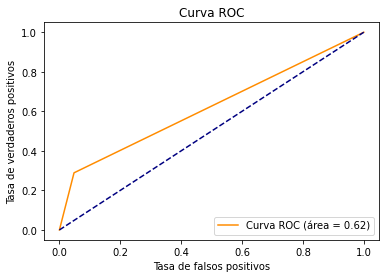

AUC: 0.6860
Confusion Matrix:
[[109  16]
 [ 45  45]]
Accuracy Score: 0.7162790697674418


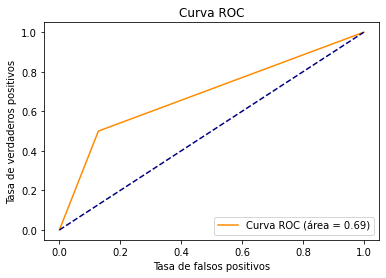

AUC: 0.6071
Confusion Matrix:
[[99 26]
 [52 38]]
Accuracy Score: 0.6372093023255814


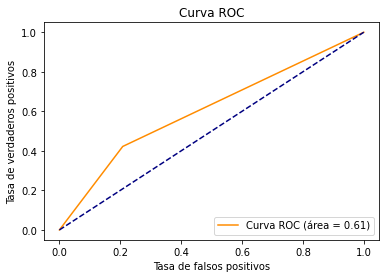

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Definir los hiperparámetros para cada método
hiperparametros_rl = {
    'lambdas': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000],
}

hiperparametros_lda = {
    'solver': 'lsqr',
}

hiperparametros_knn = {
    'n_neighbors': 3,
}

# Lista de métodos y sus hiperparámetros
metodos = [
    {
        'nombre': 'Regresión Logística',
        'hiperparametros': hiperparametros_rl,
    },
    {
        'nombre': 'Análisis de Discriminante Lineal',
        'hiperparametros': hiperparametros_lda,
    },
    {
        'nombre': 'KNN',
        'hiperparametros': hiperparametros_knn,
    },
]

# Utilizar la función evalua_multiples_metodos con datos de ejemplo
resultados = evalua_multiples_metodos(X, y, metodos)

In [64]:
# Obtener el DataFrame del primer lugar de la tupla
data_frame_resultados = resultados[0]

# Obtener el valor que se encuentra en el segundo lugar de la tupla
valor_hiperparametro_optimo = resultados[2]

# Obtener el valor que se encuentra en el segundo lugar de la tupla
mejor_metodo_res = resultados[1]

if 'Regresión Logística' in data_frame_resultados['Modelo'].values:
    # Encontrar la fila correspondiente al modelo 'Regresión Logística' y agregar el valor
    fila_regresion_logistica = data_frame_resultados[data_frame_resultados['Modelo'] == 'Regresión Logística']
    data_frame_resultados.loc[fila_regresion_logistica.index, 'Metodo'] = mejor_metodo_res
else:
    # Si no se encuentra el modelo 'Regresión Logística, configurar NaN en toda la columna
    data_frame_resultados['Metodo'] = None

# Verificar si el DataFrame contiene el modelo 'Regresión Logística' y agregar el valor al modelo adecuado
if 'Regresión Logística' in data_frame_resultados['Modelo'].values:
    # Encontrar la fila correspondiente al modelo 'Regresión Logística' y agregar el valor
    fila_regresion_logistica = data_frame_resultados[data_frame_resultados['Modelo'] == 'Regresión Logística']
    data_frame_resultados.loc[fila_regresion_logistica.index, 'Hiperparámetro Óptimo'] = valor_hiperparametro_optimo
else:
    # Si no se encuentra el modelo 'Regresión Logística, configurar NaN en toda la columna
    data_frame_resultados['Hiperparámetro Óptimo'] = None

    

# Imprimir el DataFrame modificado
print(data_frame_resultados)


        AUC       Confusion Matrix  Accuracy Score       ECM  \
0  0.620444   [[119, 6], [64, 26]]        0.674419  0.325581   
1  0.686000  [[109, 16], [45, 45]]        0.716279  0.283721   
2  0.607111   [[99, 26], [52, 38]]        0.637209  0.362791   

                             Modelo  \
0               Regresión Logística   
1  Análisis de Discriminante Lineal   
2                               KNN   

                                     Hiperparámetros Metodo  \
0  {'lambdas': [0.001, 0.01, 0.1, 1, 10, 50, 100,...  ridge   
1                                 {'solver': 'lsqr'}    NaN   
2                                 {'n_neighbors': 3}    NaN   

   Hiperparámetro Óptimo  
0                  100.0  
1                    NaN  
2                    NaN  


# Parte 3: Análisis de la base de hogares y cálculo de pobreza

In [ ]:
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
variables = respondieron.columns
for variable in variables:
   print(variable)

In [ ]:
# Eliminar columnas específicas
respondieron = respondieron.drop(columns=['CODUSU','ANO4_indv','TRIMESTRE_indv','REGION_indv', 'MAS_500_indv','ANO4_hogar','TRIMESTRE_hogar','REGION_hogar', 'MAS_500_hogar', 'CH05','CH14'])

# Eliminar un rango de columnas: ingresos de la ocupación principal de los asalariados
respondieron = respondieron.drop(columns=[col for col in respondieron.columns if col.startswith('PP08')])

# Eliminar un rango de columnas: Ingresos de la ocupación principal de los trabajadores independientes
respondieron = respondieron.drop(columns=[col for col in respondieron.columns if col.startswith('PP06')])

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('PP03C')
end = respondieron.columns.get_loc('PONDIH_indv')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('ITF_hogar')
end = respondieron.columns.get_loc('PONDIH_hogar')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('adulto_equiv')
end = respondieron.columns.get_loc('ingreso_necesario')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

In [ ]:
# Eliminar columnas específicas
norespondieron = norespondieron.drop(columns=['CODUSU','ANO4_indv','TRIMESTRE_indv','REGION_indv', 'MAS_500_indv','ANO4_hogar','TRIMESTRE_hogar','REGION_hogar', 'MAS_500_hogar', 'CH05','CH14'])

# Eliminar un rango de columnas: ingresos de la ocupación principal de los asalariados
norespondieron = norespondieron.drop(columns=[col for col in norespondieron.columns if col.startswith('PP08')])

# Eliminar un rango de columnas: Ingresos de la ocupación principal de los trabajadores independientes
norespondieron = norespondieron.drop(columns=[col for col in norespondieron.columns if col.startswith('PP06')])

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('P21')
end = norespondieron.columns.get_loc('PONDIH_indv')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('ITF_hogar')
end = norespondieron.columns.get_loc('PONDIH_hogar')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('adulto_equiv')
end = norespondieron.columns.get_loc('ad_equiv_hogar')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

In [ ]:
variables = respondieron.columns
for variable in variables:
   print(variable)

In [ ]:
# To check before running the models
# Obtener el nombre de las columnas que tienen al menos un NaN
columnas_con_nas = respondieron.columns[respondieron.isna().any()].tolist()

# Imprimir las columnas
print(columnas_con_nas)


In [ ]:
# Eliminar las observaciones con NaN en 'column_name' directamente en el DataFrame original
respondieron.dropna(subset=['CH08'], inplace=True)


In [ ]:
# Definimos la matriz de Xs 
X = respondieron.drop(['pobre'], axis=1)
y = respondieron.pobre

## Ejercicio 2

In [ ]:
#Corran la funcion evalua multiples metodos (de la Parte 2) con la base respondieron, con 
# al menos un hiperparámetro para regularizar y al menos un valor de \lambda. 

# Debes decidir el valor de h_n, digamos que es 5 para este ejemplo
h_n = 5
k = 5
# Ahora llamamos a la función
resultados_df=evalua_multiples_metodos(X, y, configuraciones, 5)
# Ver los resultados
print(resultados_df)


## Ejercicio 3

##### En el ejercicio de regularización, lambda lo que hace es penalizar la minimización de la suma de residuos al cuadrado. La idea es reducir el overfitting: imponemos un trade-off entre sesgar un poco nuestra estimación original de MCO en el conjunto de entrenamiento con el fin de reducir la varianza una vez que pasamos al conjunto de testeo. Ahora bien, considerando que un lambda alto hace que la sensibilidad del resultado ante variaciones en las variables explicativas sea menor, mientras que un valor menor de lambda hace que la aproximación se acerque a la de MCO, ¿cómo elegimos lambda? La mejor manera es realizar validación cruzada para distintos valores de lambda en un conjunto de entrenamiento y validación, elegiendo aquel que minimice la varianza en este último antes de probar en el conjunto de test. No debemos usar el conjunto de testeo para elegir el valor de lambda, ya que esto introduciría sesgo en la evaluación del rendimiento del modelo. Utilizar el conjunto de testeo para ajustar hiperparámetros haría que el modelo parezca funcionar mejor en datos no vistos de lo que realmente sería en la práctica. En cambio, la validación cruzada nos permite evaluar diferentes valores de lambda en el conjunto de entrenamiento y validación si así lo decidimos, sin involucrar el conjunto de testeo. Esto garantiza una estimación más realista del rendimiento del modelo en datos no vistos, ya que el conjunto de testeo se mantiene aislado y no se utiliza en la selección de hiperparámetros.

## Ejercicio 4

##### El método de K-fold cross-validation se utiliza para evaluar el rendimiento de modelos en machine learning dividiendo el conjunto de datos en K partes y probando iterativamente con una de ellas como conjunto de test y las demás como conjunto de entrenamiento.

##### Problema de usar un K muy pequeño: La evaluación puede ser sensible a la partición específica de los datos, lo que podría llevar a sobreajustar el modelo a ciertas peculiaridades y no generalizar bien a otros datos no vistos. 

##### Problema de usar un K muy grande (p. ej., K=n, LOOCV): En el extremo, esto implica una validación cruzada "leave-one-out," donde se deja una sola muestra como conjunto de test en cada iteración. Aunque proporciona estimaciones de rendimiento más estables, puede ser costoso en términos computacionales, especialmente en conjuntos de datos grandes.

##### Cuando K=n (LOOCV), se estima el modelo n veces, una vez por cada muestra en el conjunto de datos, entrenando en todas las muestras excepto una en cada iteración, y dejando la observación individual como testeo. Esto proporciona una estimación precisa del rendimiento, pero puede ser computacionalmente costoso y propenso a alta varianza en los resultados de los modelos. La alta variabilidad en las estimaciones de rendimiento significa que los resultados de cada iteración de LOOCV pueden diferir considerablemente entre sí. Esto puede hacer que sea más difícil confiar en las estimaciones de rendimiento y comparar diferentes configuraciones de modelos o hiperparámetros.

## Ejercicio 5

#### Realicen un barrido en λ = 10^n con n ∈ {−5, −4, −3 . . . , +4, +5} y utilicen 10 fold CV para elegir el λ optimo en regresion logistica con Ridge y con LASSO.
#### ¿Qué λ seleccionó en cada caso? Generen box-plots mostrando la distribución del error de predicci´on para cada λ. Cada box debe corresponder a un valor de λ y contener como observaciones el error medio de validaci´on para cada partici´on.
#### Ademas, para la regularizacion LASSO, genere un box-plot similar, pero ahora graficando la proporci´on de variables ignoradas por el modelo en funci´on de λ, es decir la proporcion de variables para las cuales el coeficiente asociado es cero.


In [ ]:
lambda_values = [10**i for i in range(-5, 6)]
configuraciones_lasso = []
configuraciones_ridge = []

for l in lambda_values:
    # Para Lasso
    config_l = {'penalty': 'l1', 'C': 1/l, 'solver': 'saga'}
    configuraciones_lasso.append(config_l)
    
    # Para Ridge
    config_r = {'penalty': 'l2', 'C': 1/l}
    configuraciones_ridge.append(config_r) 

In [ ]:
config_opt_lasso = evalua_config(configuraciones_lasso, X, y,5)
config_opt_ridge = evalua_config(configuraciones_ridge, X, y,5)

In [ ]:
k = 10
dist_lasso = []

# Generaremos dos gráficos, uno por método. En cada gráfico, se muestra la distribución del error de predicción (definido como MSE) según el hiperparámetro lambda.
for config in configuraciones_lasso:
    modelo = LogisticRegression(max_iter=500, **config)
    resultados = cross_validation(modelo, k, X, y)
    ecm_part = resultados[['Particion', 'MSE']]
    dist_lasso.append(ecm_part)

# Crear un gráfico con 10 boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Lista de etiquetas para los boxplots
#labels = [f'DataFrame {i + 1}' for i in range(10)]

# Recopilar todas las distribuciones de MSE
mse_data = [ecm_part['MSE'].values for ecm_part in dist_lasso]

# Crear los boxplots y agregarlos al gráfico
boxplots = ax.boxplot(mse_data, patch_artist=True)

# Personalizar los colores de los boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'lightgray', 'lightcyan', 'lightmagenta', 'lightsalmon', 'lightseagreen']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Configurar el gráfico
ax.set(title='Distribuciones de MSE, según el parámetro lambda', xlabel='Lambdas', ylabel='MSE')



In [ ]:
k = 10
dist_ridge = []

# Generaremos dos gráficos, uno por método. En cada gráfico, se muestra la distribución del error de predicción (definido como MSE) según el hiperparámetro lambda.
for config in configuraciones_ridge:
    modelo = LogisticRegression(max_iter=500, **config)
    resultados = cross_validation(modelo, k, X, y)
    ecm_part = resultados[['Particion', 'MSE']]
    dist_ridge.append(ecm_part)

# Crear un gráfico con 10 boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Lista de etiquetas para los boxplots
#labels = [f'DataFrame {i + 1}' for i in range(10)]

# Recopilar todas las distribuciones de MSE
mse_data = [ecm_part['MSE'].values for ecm_part in dist_ridge]

# Crear los boxplots y agregarlos al gráfico
boxplots = ax.boxplot(mse_data, patch_artist=True)

# Personalizar los colores de los boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'lightgray', 'lightcyan', 'lightmagenta', 'lightsalmon', 'lightseagreen']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Configurar el gráfico
ax.set(title='Distribuciones de MSE, según el parámetro lambda', xlabel='Lambdas', ylabel='MSE')

In [ ]:
proporciones_lasso = []

# Calcular la proporción de coeficientes a cero para cada valor de lambda en LASSO
for config in configuraciones_lasso:
    modelo = LogisticRegression(max_iter=500, **config)
    modelo.fit(X, y)  # Ajustar el modelo con todo el conjunto de datos para obtener los coeficientes
    coef_cero = sum(modelo.coef_ == 0)  # Contar coeficientes iguales a cero
    total_coef = modelo.coef_.size  # Contar total de coeficientes
    prop_coef_cero = coef_cero / total_coef  # Calcular proporción
    proporciones_lasso.append(prop_coef_cero)

# Crear un nuevo gráfico para mostrar la proporción de coeficientes a cero por valor de lambda en LASSO
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(lambda_values, proporciones_lasso, marker='o', linestyle='-')

# Configurar el gráfico
ax.set(title='Proporción de coeficientes a cero en LASSO por valor de lambda', xlabel='Valor de lambda (log scale)', ylabel='Proporción de coeficientes a cero')
ax.set_xscale('log')  # Utilizar escala logarítmica en el eje x

# Mostrar el gráfico
plt.show()


## Ejercicio 6

In [ ]:
## Respondemos esto en el reporte

## Ejercicio 7

In [ ]:
## No se si hacer full texto o si correr algo aqui

## Ejercicio 8

In [ ]:
## No se si hacer full texto o si correr algo aqui

## Ejercicio 9

In [ ]:
#Con el metodo que seleccionaron, predigan qu´e personas son pobres dentro de la base norespondieron. ¿Qu´e proporci´on de los hogares son pobres en esa
#submuestra?